## Prediccion

Cargar el modelo entrenado y obtener las predicciones

In [1]:
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.insert(1, os.path.join(sys.path[0], '..'))


def predicting(filename, model_name, model_version=1, model_stage=None):
    with mlflow.start_run(run_name='predicting') as mlrun:
        X_inference = pd.read_csv(filename)

        if model_stage:
            model = mlflow.sklearn.load_model(
                model_uri=f"models:/{model_name}/{model_stage}"
            )
            print(f"Loading model: {model_name}:{model_stage}")
        else:
            model = mlflow.sklearn.load_model(
                model_uri=f"models:/{model_name}/{model_version}"
            )
            print(f"Loading model: {model_name}:{model_version}")

        predictions = model.predict(X_inference)
        # print(predictions[:5])
        with open('predictions.npy', 'wb') as f:
            np.save(f, predictions)
        mlflow.log_artifact('predictions.npy')

        return predictions

In [2]:
filename = "preprocessed_data.csv"
predictions = predicting(filename, model_name="extratree", model_version=4)

Loading model: extratree:4


/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
predictions[:5]

array([32, 11, 12,  9,  1])

[ 1  5  7  8  9 10 11 12 13 14 24 27 28 29 31 32 34 36]


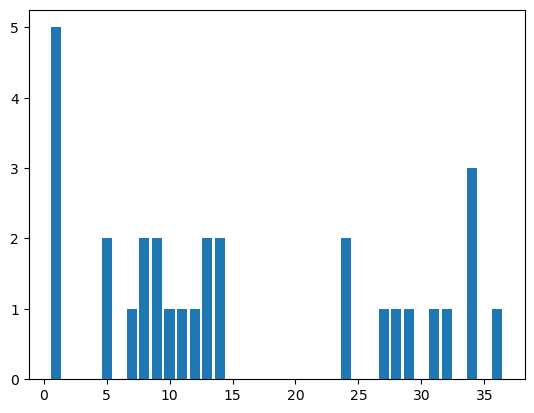

In [4]:
unique, counts = np.unique(predictions, return_counts=True)
d = dict(zip(unique, counts))
plt.bar(*zip(*d.items()))

print(unique)
plt.show()